# Problem Statement

 to identify the characteristics of the target audience for each type of treadmill offered by the company

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [129]:
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [131]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


#Insights

1. There are 3 products named KP281, KP481 & KP781 for Aerofit Treadmills

2. Total data we have is of 180 rows and 9 columns with no empty values(NaN or Null) and no duplicate data

3. Highest frequent data is of KP281 product comprising of 80 rows out of 180

4. Age of customers range from min(18) to max(50) with average of 28.78, 25th percentile is 24, 50th percentile(median) is 26 and 75th percentile is 33, and having standard deviation of 6.94

5. There are 2 unique gender types which are male and female in which male is most frequent occuring in 104 rows out of 180 remaining with female which is 76

6. Education of customers range from min(12) to max(21) with average of 15.57, 25th percentile is 14, 50th percentile(median) is 16 and 75th percentile is 16, and having standard deviation of 1.61

7. There are 2 unique MaritalStatus types which are Partnered and Single in which Partnered is most frequent occuring in 107    rows out of 180 remaining with Single which is 73

8. Usage of customers range from min(2) to max(7) with average of 3.45, 25th percentile is 3, 50th percentile(median) is 3 and 75th percentile is 4, and having standard deviation of 1.08

9. Fitness of customers range from min(1) to max(5) with average of 3.31, 25th percentile is 3, 50th percentile(median) is 3 and 75th percentile is 4, and having standard deviation of 0.95

10. Income of customers range from min(29562) to max(104581) with average of 53719.57, 25th percentile is 44058.75, 50th percentile(median) is 50596.50 and 75th percentile is 58668, and having standard deviation of 16506.68

11. Miles of customers range from min(21) to max(360) with average of 103.19, 25th percentile is 66, 50th percentile(median) is 94 and 75th percentile is 114.75, and having standard deviation of 51.86

In [132]:
np.any(df.duplicated())

False

In [133]:
np.unique(df['Product'],return_counts=True)

(array(['KP281', 'KP481', 'KP781'], dtype=object),
 array([80, 60, 40], dtype=int64))

<AxesSubplot:xlabel='Product', ylabel='Count'>

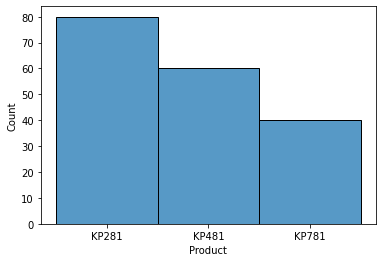

In [134]:
sns.histplot(data=df,x='Product')

#Insight

In total number of data there is 80 rows for KP281, 60 rows for KP481, 40 rows for KP781

In [135]:
np.unique(df['Age'],return_counts=True)

(array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50],
       dtype=int64),
 array([ 1,  4,  5,  7,  7, 18, 12, 25, 12,  7,  9,  6,  7,  6,  4,  8,  6,
         8,  1,  2,  7,  1,  5,  1,  1,  1,  1,  2,  1,  2,  2,  1],
       dtype=int64))

#Insight

Customers of age 25 are most frequent with 25 occurances then 23 with 18 and 24 with 12, so this conclude customers are majorily of age 23 to 25

In [136]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [137]:
np.unique(df['Education'],return_counts=True)

(array([12, 13, 14, 15, 16, 18, 20, 21], dtype=int64),
 array([ 3,  5, 55,  5, 85, 23,  1,  3], dtype=int64))

#Insight

Most customers are of education level of 16 with 85 in count then of education level of 14 with 55 in count

In [138]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [139]:
np.unique(df['Usage'],return_counts=True)

(array([2, 3, 4, 5, 6, 7], dtype=int64),
 array([33, 69, 52, 17,  7,  2], dtype=int64))

#Insight

Most customers usage range from 2 to 6, most frequent are of usage 3 counting 69 then usage 4 counting 52 and so on

In [140]:
np.unique(df['Fitness'],return_counts=True)

(array([1, 2, 3, 4, 5], dtype=int64), array([ 2, 26, 97, 24, 31], dtype=int64))

#Insight

Most customers fitness range from 2 to 5, most frequent are of fitness 3 counting 97 then fitness 5 counting 31 and so on

In [141]:
np.unique(df['Income'],return_counts=True)

(array([ 29562,  30699,  31836,  32973,  34110,  35247,  36384,  37521,
         38658,  39795,  40932,  42069,  43206,  44343,  45480,  46617,
         47754,  48556,  48658,  48891,  49801,  50028,  51165,  52290,
         52291,  52302,  53439,  53536,  54576,  54781,  55713,  56850,
         57271,  57987,  58516,  59124,  60261,  61006,  61398,  62251,
         62535,  64741,  64809,  65220,  67083,  68220,  69721,  70966,
         74701,  75946,  77191,  83416,  85906,  88396,  89641,  90886,
         92131,  95508,  95866,  99601, 103336, 104581], dtype=int64),
 array([ 1,  1,  2,  5,  5,  5,  4,  2,  5,  2,  6,  2,  5,  4, 14,  8,  2,
         2,  1,  5,  2,  7,  7,  1,  1,  9,  8,  1,  8,  1,  1,  2,  1,  4,
         1,  3,  3,  2,  2,  1,  1,  2,  3,  1,  2,  1,  1,  1,  1,  1,  1,
         2,  1,  2,  2,  3,  3,  1,  1,  1,  1,  2], dtype=int64))

#Insight

Here variety of income earning customers are distributed so there is no range but most occuring income is 45480 which is 14 in count

In [142]:
np.unique(df['Miles'],return_counts=True)

(array([ 21,  38,  42,  47,  53,  56,  64,  66,  74,  75,  80,  85,  94,
         95, 100, 103, 106, 112, 113, 120, 127, 132, 140, 141, 150, 160,
        169, 170, 180, 188, 200, 212, 240, 260, 280, 300, 360], dtype=int64),
 array([ 1,  3,  4,  9,  7,  6,  6, 10,  3, 10,  1, 27,  8, 12,  7,  3,  9,
         1,  8,  3,  5,  2,  1,  2,  4,  5,  1,  3,  6,  1,  6,  1,  1,  1,
         1,  1,  1], dtype=int64))

#Insight

Most customers miles contains in [66,75,85,95] , most frequent are of miles 85 counting 27 then miles 95 counting 12 and so on

Categorised Users on the basis of product

In [143]:
p_1 = df.loc[df['Product']=='KP281']
p_2 = df.loc[df['Product']=='KP481']
p_3 = df.loc[df['Product']=='KP781']

In [144]:
p_1.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,80,80.000000,80,80.000000,80,80.000000,80.00000,80.00000,80.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,40,NaN,48,NaN,NaN,NaN,NaN
mean,NaN,28.550000,NaN,15.037500,NaN,3.087500,2.96250,46418.02500,82.787500
std,NaN,7.221452,NaN,1.216383,NaN,0.782624,0.66454,9075.78319,28.874102
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.00000,29562.00000,38.000000
25%,NaN,23.000000,NaN,14.000000,NaN,3.000000,3.00000,38658.00000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.00000,46617.00000,85.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,3.00000,53439.00000,94.000000


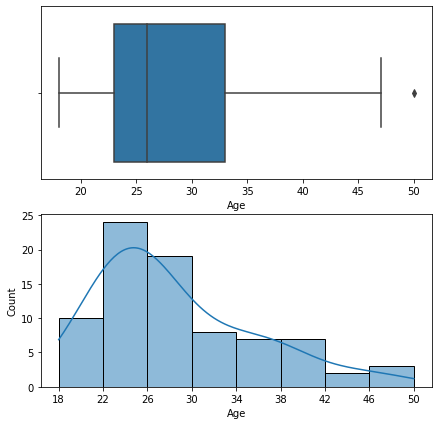

In [145]:
figure, axes = plt.subplots(2,figsize=(7,7))

sns.boxplot(ax=axes[0],data=p_1,x = 'Age')
sns.histplot(ax=axes[1],data=p_1,x='Age',kde=True,bins=8)
plt.xticks(np.arange(18,51,4))
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

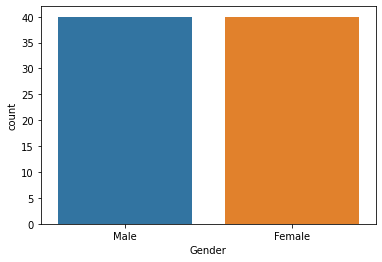

In [146]:
sns.countplot(data = p_1,x='Gender')

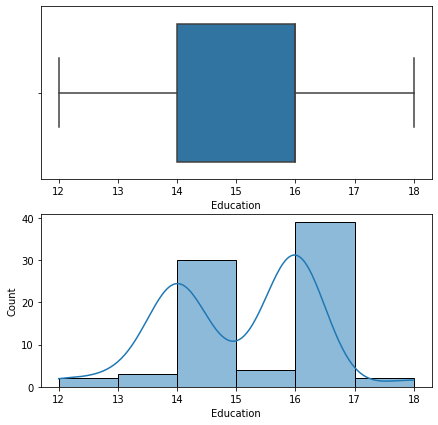

In [147]:
figure, axes = plt.subplots(2,figsize=(7,7))
sns.boxplot(ax=axes[0],data=p_1,x = 'Education')
sns.histplot(ax=axes[1],data=p_1,x='Education',kde=True,bins=6)
plt.xticks(np.arange(12,19,1))
plt.show()

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

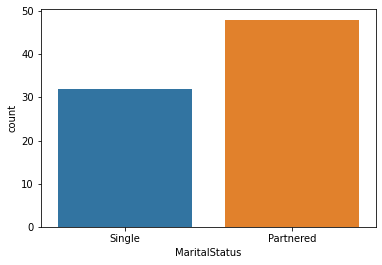

In [148]:
sns.countplot(data = p_1,x='MaritalStatus')

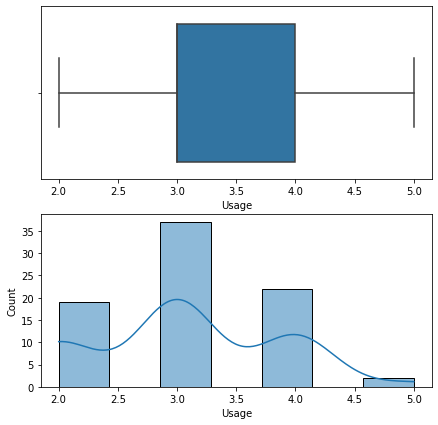

In [149]:
figure, axes = plt.subplots(2,figsize=(7,7))

sns.boxplot(ax=axes[0],data=p_1,x = 'Usage')
sns.histplot(ax=axes[1],data=p_1,x='Usage',kde=True,bins=7)
plt.xticks(np.arange(2,5.1,.5))
plt.show()

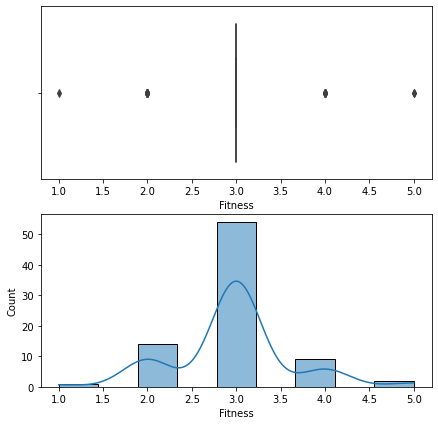

In [150]:
figure, axes = plt.subplots(2,figsize=(7,7))

sns.boxplot(ax=axes[0],data=p_1,x = 'Fitness')
sns.histplot(ax=axes[1],data=p_1,x='Fitness',kde=True,bins=9)
plt.xticks(np.arange(1,5.1,.5))
plt.show()

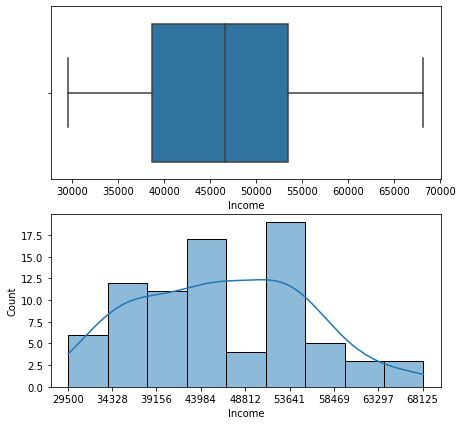

In [151]:
figure, axes = plt.subplots(2,figsize=(7,7))
sns.boxplot(ax=axes[0],data=p_1,x = 'Income')
sns.histplot(ax=axes[1],data=p_1,x='Income',kde=True,bins=9)
plt.xticks(np.linspace(29500,68125,9))
plt.show()

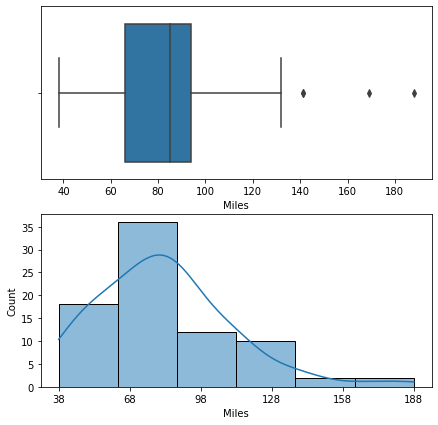

In [152]:
figure, axes = plt.subplots(2,figsize=(7,7))
sns.boxplot(ax=axes[0],data=p_1,x = 'Miles')
sns.histplot(ax=axes[1],data=p_1,x='Miles',kde=True,bins=6)
plt.xticks(np.linspace(38,188,6))
plt.show()

In [153]:
p_2.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,60,60.000000,60,60.000000,60,60.000000,60.00000,60.000000,60.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP481,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,60,NaN,31,NaN,36,NaN,NaN,NaN,NaN
mean,NaN,28.900000,NaN,15.116667,NaN,3.066667,2.90000,48973.650000,87.933333
std,NaN,6.645248,NaN,1.222552,NaN,0.799717,0.62977,8653.989388,33.263135
min,NaN,19.000000,NaN,12.000000,NaN,2.000000,1.00000,31836.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.00000,44911.500000,64.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.00000,49459.500000,85.000000
75%,NaN,33.250000,NaN,16.000000,NaN,3.250000,3.00000,53439.000000,106.000000


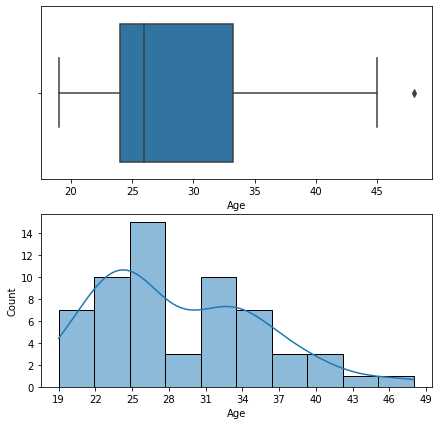

In [154]:
figure, axes = plt.subplots(2,figsize=(7,7))
sns.boxplot(ax=axes[0],data=p_2,x = 'Age')
sns.histplot(ax=axes[1],data=p_2,x='Age',kde=True,bins=10)
plt.xticks(np.arange(19,50,3))
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

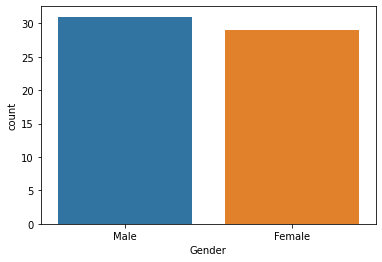

In [155]:
sns.countplot(data = p_2,x='Gender')

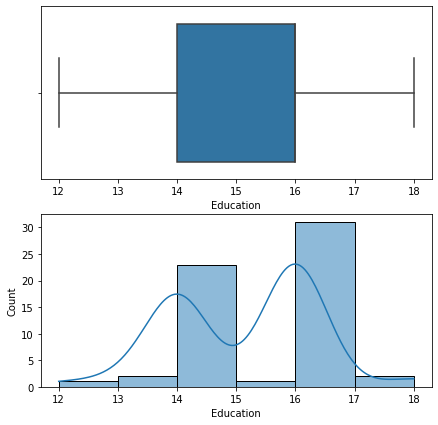

In [156]:
figure, axes = plt.subplots(2,figsize=(7,7))
sns.boxplot(ax = axes[0],data=p_2,x = 'Education')
sns.histplot(ax = axes[1],data=p_2,x='Education',kde=True,bins=6)
plt.xticks(np.arange(12,19,1))
plt.show()

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

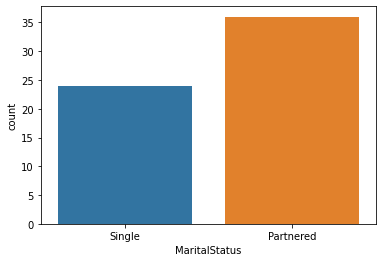

In [157]:
sns.countplot(data = p_2,x='MaritalStatus')

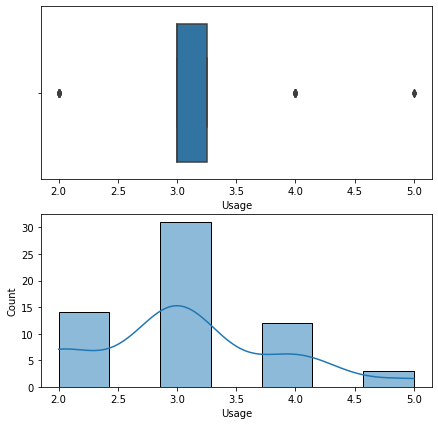

In [158]:
figure, axes = plt.subplots(2,figsize=(7,7))
sns.boxplot(ax = axes[0],data=p_2,x = 'Usage')
sns.histplot(ax = axes[1],data=p_2,x='Usage',kde=True,bins=7)
plt.xticks(np.arange(2,5.1,.5))
plt.show()

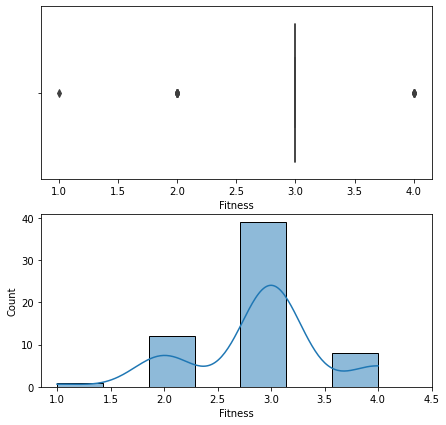

In [159]:
figure, axes = plt.subplots(2,figsize=(7,7))
sns.boxplot(ax = axes[0],data=p_2,x = 'Fitness')
sns.histplot(ax = axes[1],data=p_2,x='Fitness',kde=True,bins=7)
plt.xticks(np.arange(1,5,0.5))
plt.show()

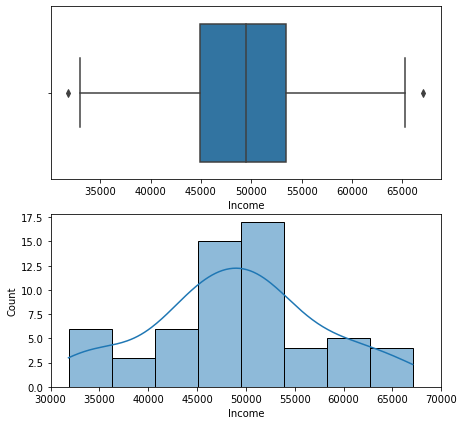

In [160]:
figure, axes = plt.subplots(2,figsize=(7,7))
sns.boxplot(ax = axes[0],data=p_2,x = 'Income')
sns.histplot(ax = axes[1],data=p_2,x='Income',kde=True,bins=8)
plt.xticks(np.arange(30000,70001,5000))
plt.show()

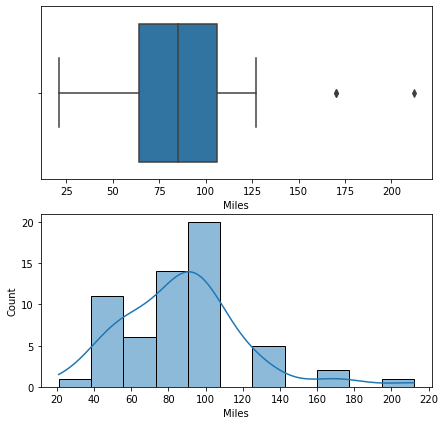

In [161]:
figure, axes = plt.subplots(2,figsize=(7,7))
sns.boxplot(ax=axes[0],data=p_2,x = 'Miles')
sns.histplot(ax=axes[1],data=p_2,x='Miles',kde=True,bins=11)
plt.xticks(np.arange(20,221,20))
plt.show()

In [162]:
p_3.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,40,40.000000,40,40.000000,40,40.000000,40.000000,40.00000,40.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP781,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,40,NaN,33,NaN,23,NaN,NaN,NaN,NaN
mean,NaN,29.100000,NaN,17.325000,NaN,4.775000,4.625000,75441.57500,166.900000
std,NaN,6.971738,NaN,1.639066,NaN,0.946993,0.667467,18505.83672,60.066544
min,NaN,22.000000,NaN,14.000000,NaN,3.000000,3.000000,48556.00000,80.000000
25%,NaN,24.750000,NaN,16.000000,NaN,4.000000,4.000000,58204.75000,120.000000
50%,NaN,27.000000,NaN,18.000000,NaN,5.000000,5.000000,76568.50000,160.000000
75%,NaN,30.250000,NaN,18.000000,NaN,5.000000,5.000000,90886.00000,200.000000


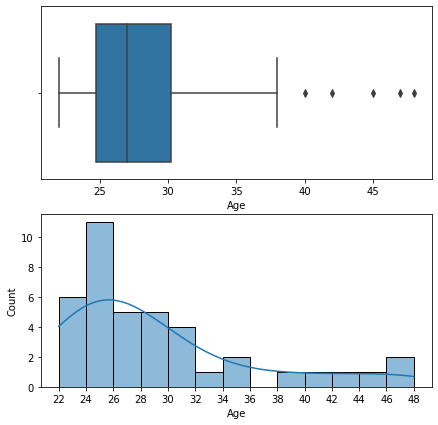

In [163]:
figure, axes= plt.subplots(2,figsize=(7,7))
sns.boxplot(ax=axes[0],data=p_3,x = 'Age')
sns.histplot(ax=axes[1],data=p_3,x='Age',kde=True,bins=13)
plt.xticks(np.arange(22,49,2))
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

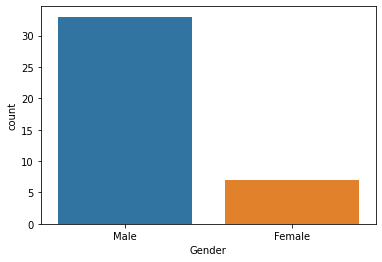

In [164]:
sns.countplot(data = p_3,x='Gender')

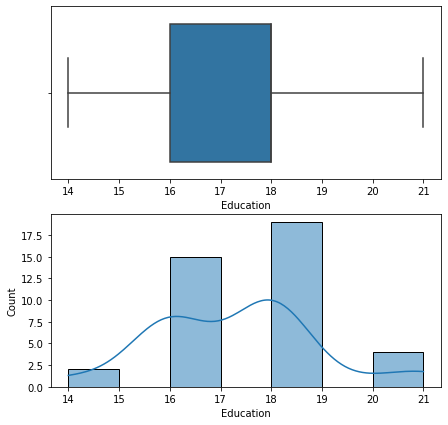

In [165]:
figure, axes= plt.subplots(2,figsize=(7,7))
sns.boxplot(ax=axes[0],data=p_3,x = 'Education')
sns.histplot(ax=axes[1],data=p_3,x='Education',kde=True,bins=7)
plt.xticks(np.arange(14,22,1))
plt.show()

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

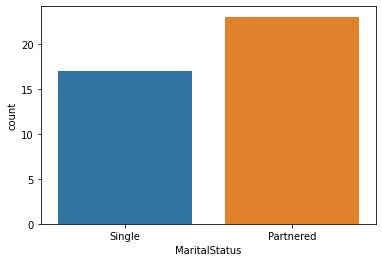

In [166]:
sns.countplot(data = p_3,x='MaritalStatus')

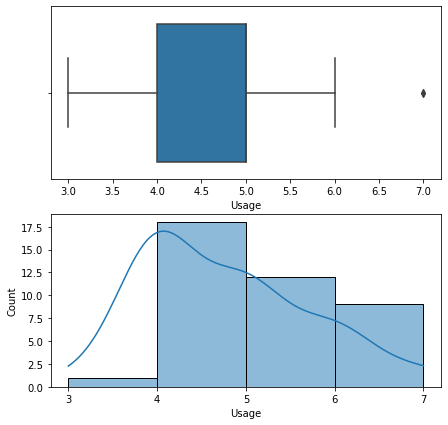

In [167]:
figure, axes= plt.subplots(2,figsize=(7,7))
sns.boxplot(ax=axes[0],data=p_3,x = 'Usage')
sns.histplot(ax=axes[1],data=p_3,x='Usage',kde=True,bins=4)
plt.xticks(np.arange(3,8,1))
plt.show()

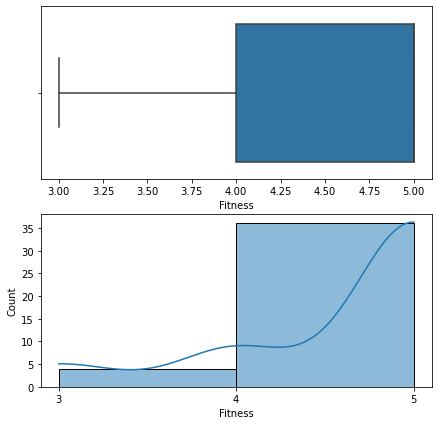

In [168]:
figure, axes= plt.subplots(2,figsize=(7,7))
sns.boxplot(ax=axes[0],data=p_3,x = 'Fitness')
sns.histplot(ax=axes[1],data=p_3,x='Fitness',kde=True,bins=2)
plt.xticks(np.arange(3.0,6,1))
plt.show()

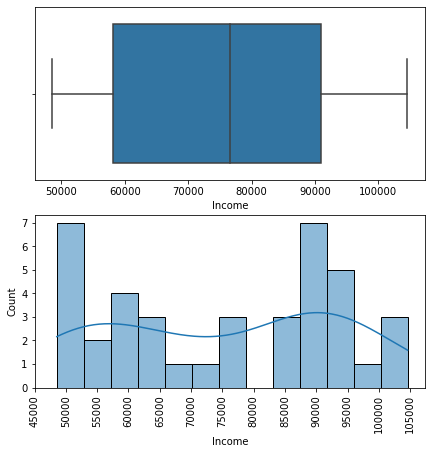

In [169]:
figure, axes = plt.subplots(2,figsize=(7,7))
sns.boxplot(ax=axes[0],data=p_3,x = 'Income')
sns.histplot(ax=axes[1],data=p_3,x='Income',kde=True,bins=13)
plt.xticks(np.arange(45000,110000,5000),rotation = 90)
plt.show()

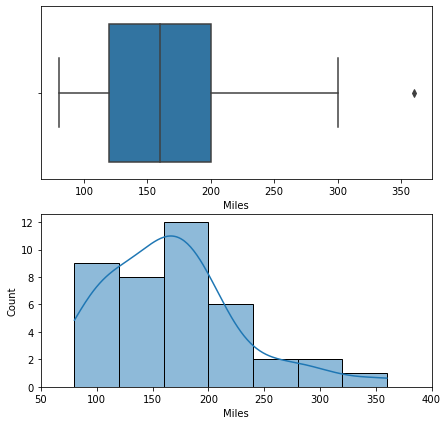

In [170]:
figure, axes = plt.subplots(2,figsize=(7,7))
sns.boxplot(ax = axes[0],data=p_3,x = 'Miles')
sns.histplot(ax=axes[1],data=p_3,x='Miles',kde=True,bins=7)
plt.xticks(np.arange(50,450,50))
plt.show()

In [171]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


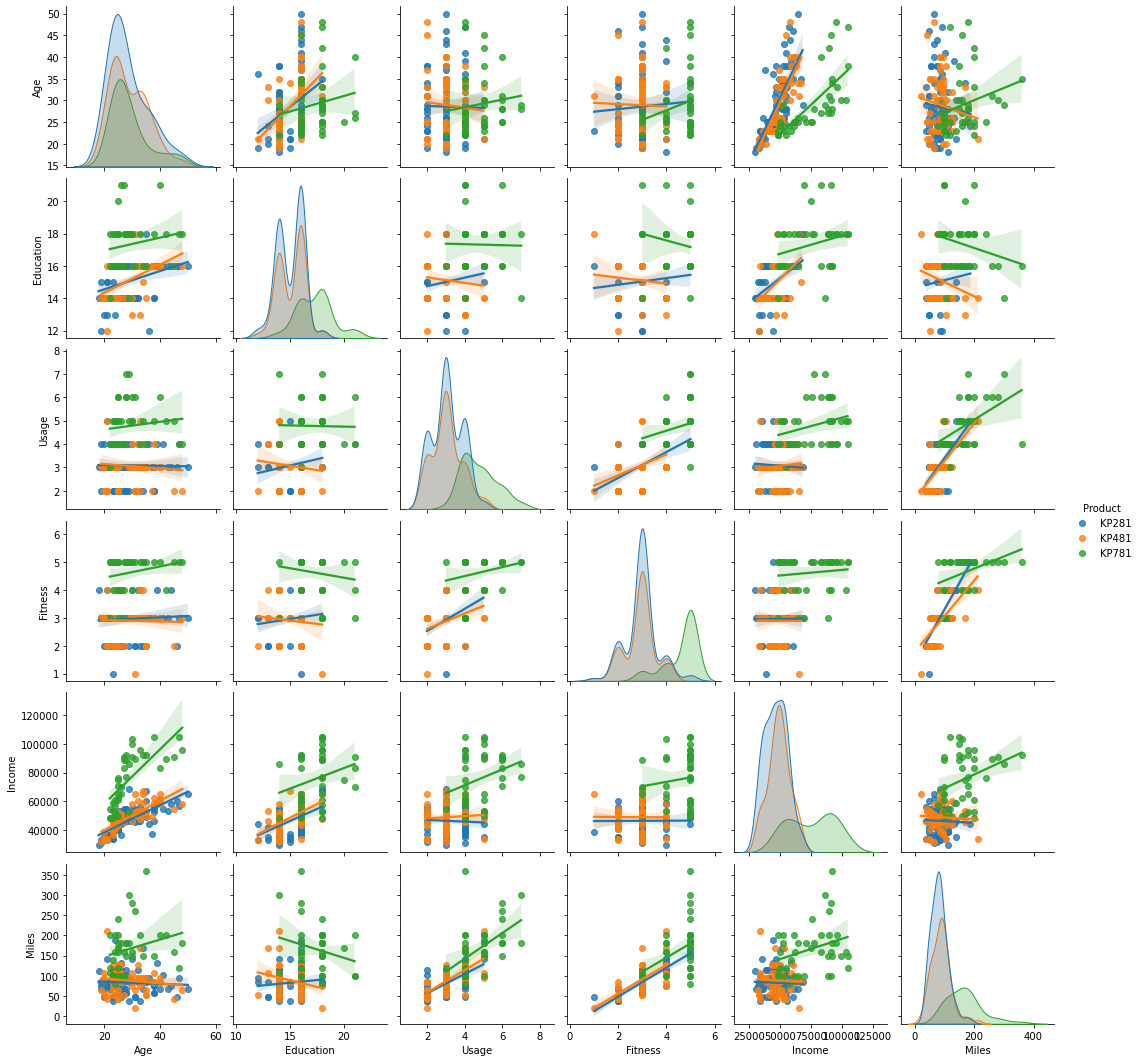

In [172]:
sns.pairplot(df,kind='reg',hue='Product')

In [173]:
p_1.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.336268,-0.015342,0.054469,0.751831,-0.064632
Education,0.336268,1.000000,0.169369,0.111379,0.446551,0.111956
Usage,-0.015342,0.169369,1.000000,0.468825,-0.052227,0.645576
Fitness,0.054469,0.111379,0.468825,1.000000,0.005906,0.826177
Income,0.751831,0.446551,-0.052227,0.005906,1.000000,-0.039377
Miles,-0.064632,0.111956,0.645576,0.826177,-0.039377,1.000000


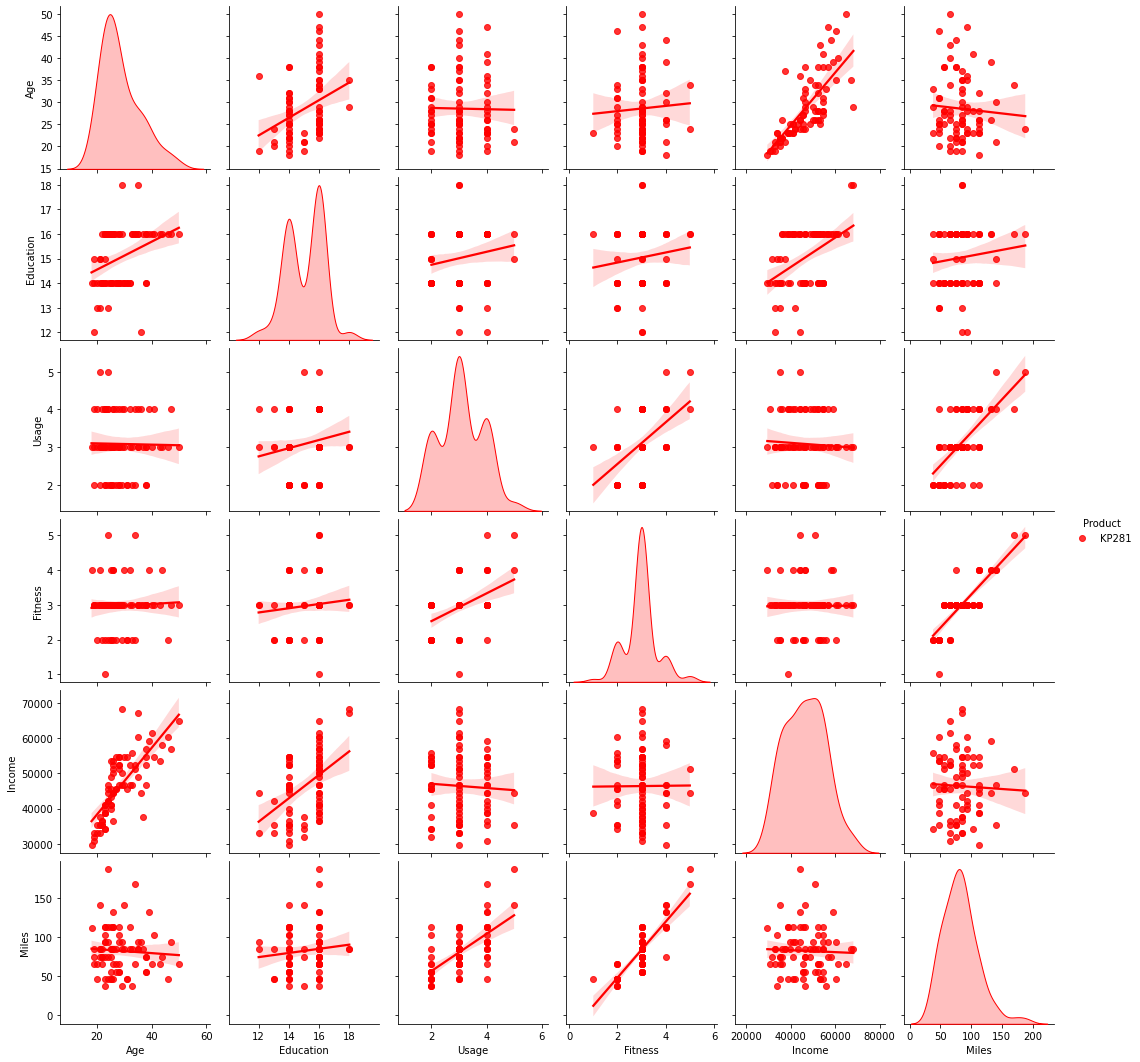

In [174]:
sns.pairplot(p_1,kind='reg',hue='Product',palette = {'KP281':'RED','KP481':'GREEN','KP781':'BLUE'})

In [175]:
p_2.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.472956,-0.078458,-0.026730,0.787550,-0.124710
Education,0.472956,1.000000,-0.112105,-0.094660,0.540207,-0.240293
Usage,-0.078458,-0.112105,1.000000,0.349996,0.073367,0.673648
Fitness,-0.026730,-0.094660,0.349996,1.000000,-0.008086,0.676894
Income,0.787550,0.540207,0.073367,-0.008086,1.000000,-0.054691
Miles,-0.124710,-0.240293,0.673648,0.676894,-0.054691,1.000000


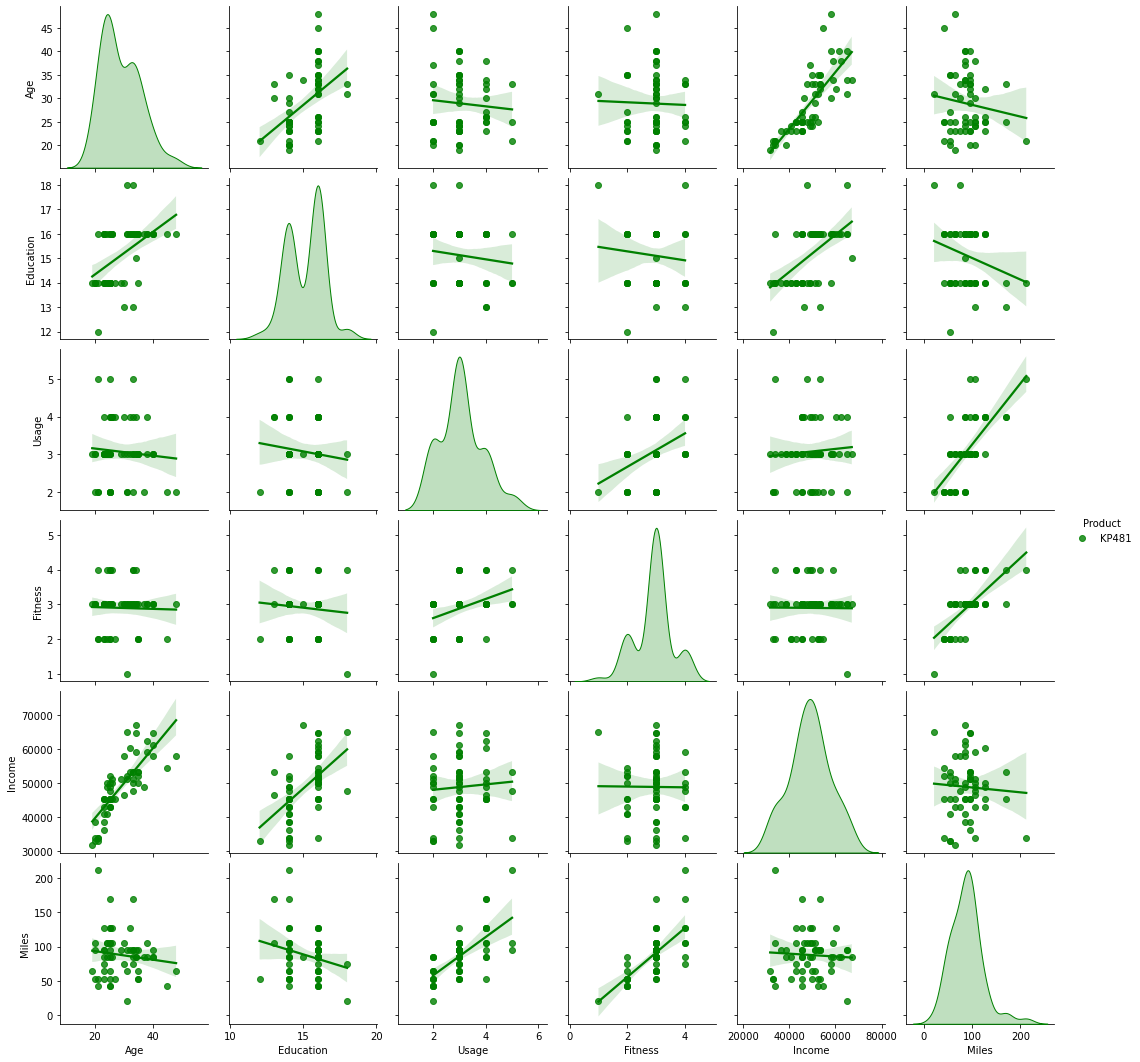

In [176]:
sns.pairplot(p_2,kind='reg',hue='Product',palette = {'KP281':'RED','KP481':'GREEN','KP781':'BLUE'})

In [177]:
p_3.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.167617,0.120007,0.212141,0.713489,0.243106
Education,0.167617,1.000000,-0.017758,-0.166991,0.252306,-0.228587
Usage,0.120007,-0.017758,1.000000,0.228182,0.281543,0.503106
Fitness,0.212141,-0.166991,0.228182,1.000000,0.110507,0.391083
Income,0.713489,0.252306,0.281543,0.110507,1.000000,0.309289
Miles,0.243106,-0.228587,0.503106,0.391083,0.309289,1.000000


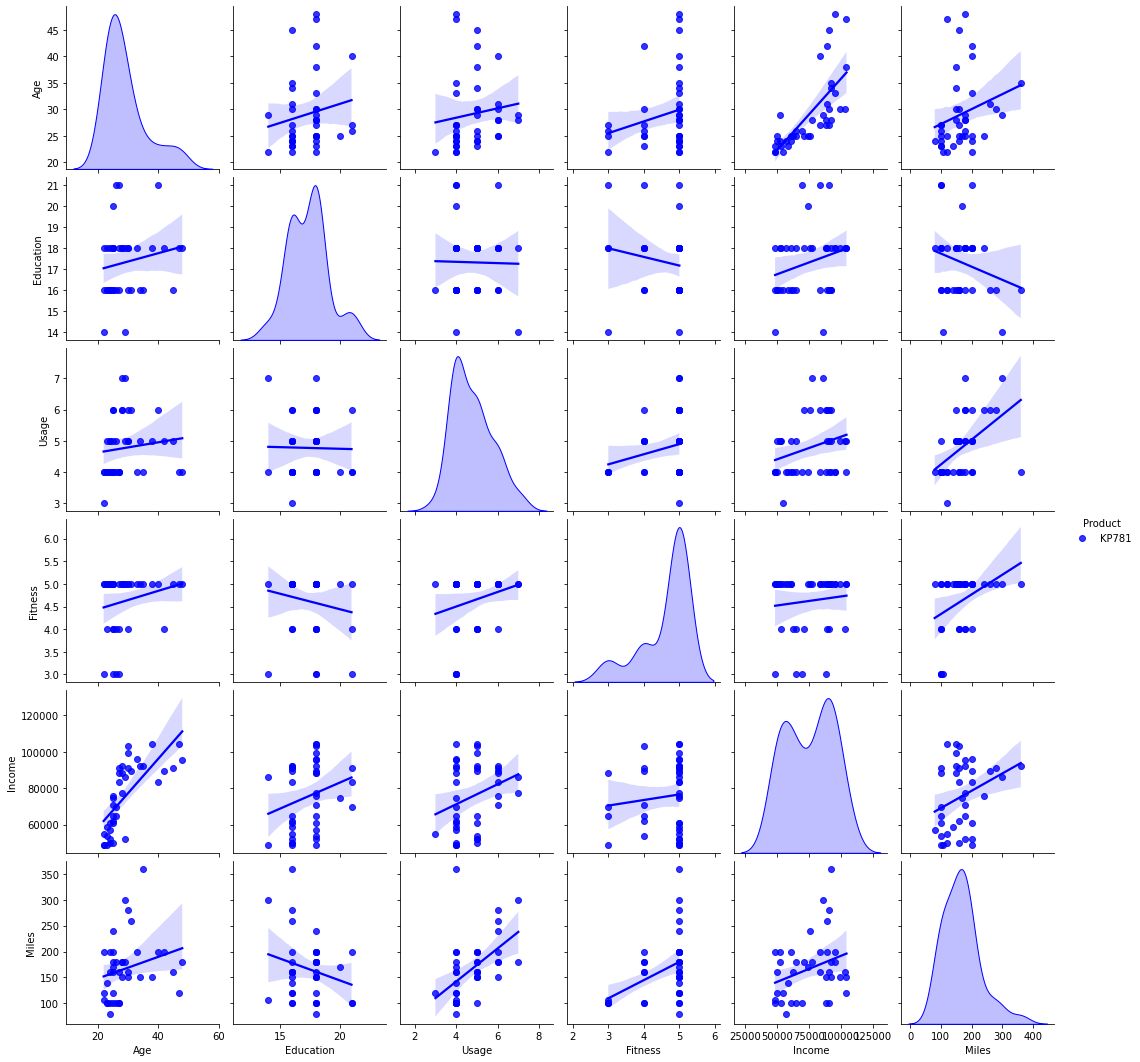

In [178]:
sns.pairplot(p_3,kind='reg',hue='Product',palette = {'KP281':'RED','KP481':'GREEN','KP781':'BLUE'})

In [179]:
prob_male = df.loc[df['Gender']=='Male'].shape[0]/df.shape[0]
prob_female = df.loc[df['Gender']=='Female'].shape[0]/df.shape[0]
prob_married = df.loc[df['MaritalStatus']=='Partnered'].shape[0]/df.shape[0]
prob_unmarried = df.loc[df['MaritalStatus']=='Single'].shape[0]/df.shape[0]

print("Male customers are {:.2%}, Female customers are {:.2%}, Married customers are {:.2%}, Unmarried customers are {:.2%} of total".format(prob_male, prob_female, prob_married, prob_unmarried))

Male customers are 57.78%, Female customers are 42.22%, Married customers are 59.44%, Unmarried customers are 40.56% of total


In [180]:
p_1prob = p_1.shape[0]/df.shape[0]
p_2prob = p_2.shape[0]/df.shape[0]
p_3prob = p_3.shape[0]/df.shape[0]
print("Probability that an individual had bought KP281 treadmill is {:.2%}".format(p_1prob))
print("Probability that an individual had bought KP481 treadmill is {:.2%}".format(p_2prob))
print("Probability that an individual had bought KP781 treadmill is {:.2%}".format(p_3prob))

Probability that an individual had bought KP281 treadmill is 44.44%
Probability that an individual had bought KP481 treadmill is 33.33%
Probability that an individual had bought KP781 treadmill is 22.22%


In [181]:
prob_KP281_male = (p_1.loc[p_1['Gender']=='Male'].shape[0]/df.shape[0])/prob_male
prob_KP281_female = (p_1.loc[p_1['Gender']=='Female'].shape[0]/df.shape[0])/prob_female
prob_KP481_male = (p_2.loc[p_2['Gender']=='Male'].shape[0]/df.shape[0])/prob_male
prob_KP481_female = (p_2.loc[p_2['Gender']=='Female'].shape[0]/df.shape[0])/prob_female
prob_KP781_male = (p_3.loc[p_3['Gender']=='Male'].shape[0]/df.shape[0])/prob_male
prob_KP781_female = (p_3.loc[p_3['Gender']=='Female'].shape[0]/df.shape[0])/prob_female

print("Male that have bought KP281 is {:.2%}".format(prob_KP281_male))
print("Female that have bought KP281 is {:.2%}".format(prob_KP281_female))
print("Male that have bought KP481 is {:.2%}".format(prob_KP481_male))
print("Female that have bought KP481 is {:.2%}".format(prob_KP481_female))
print("Male that have bought KP781 is {:.2%}".format(prob_KP781_male))
print("Female that have bought KP781 is {:.2%}".format(prob_KP781_female))

Male that have bought KP281 is 38.46%
Female that have bought KP281 is 52.63%
Male that have bought KP481 is 29.81%
Female that have bought KP481 is 38.16%
Male that have bought KP781 is 31.73%
Female that have bought KP781 is 9.21%


In [182]:
prob_male_KP281 = (prob_male*prob_KP281_male)/p_1prob
prob_female_KP281 = (prob_female*prob_KP281_female)/p_1prob
prob_male_KP481 = (prob_male*prob_KP481_male)/p_2prob
prob_female_KP481 = (prob_female*prob_KP481_female)/p_2prob
prob_male_KP781 = (prob_male*prob_KP781_male)/p_3prob
prob_female_KP781 = (prob_female*prob_KP781_female)/p_3prob

print("Customers who have bought KP281 are males is {:.2%}".format(prob_male_KP281))
print("Customers who have bought KP281 are females is {:.2%}".format(prob_female_KP281))
print("Customers who have bought KP481 are males is {:.2%}".format(prob_male_KP481))
print("Customers who have bought KP481 are females is {:.2%}".format(prob_female_KP481))
print("Customers who have bought KP781 are males is {:.2%}".format(prob_male_KP781))
print("Customers who have bought KP781 are females is {:.2%}".format(prob_female_KP781))

Customers who have bought KP281 are males is 50.00%
Customers who have bought KP281 are females is 50.00%
Customers who have bought KP481 are males is 51.67%
Customers who have bought KP481 are females is 48.33%
Customers who have bought KP781 are males is 82.50%
Customers who have bought KP781 are females is 17.50%


In [183]:
prob_KP281_married = (p_1.loc[p_1['MaritalStatus']=='Partnered'].shape[0]/df.shape[0])/prob_married
prob_KP281_unmarried = (p_1.loc[p_1['MaritalStatus']=='Single'].shape[0]/df.shape[0])/prob_unmarried
prob_KP481_married = (p_2.loc[p_2['MaritalStatus']=='Partnered'].shape[0]/df.shape[0])/prob_married
prob_KP481_unmarried = (p_2.loc[p_2['MaritalStatus']=='Single'].shape[0]/df.shape[0])/prob_unmarried
prob_KP781_married = (p_3.loc[p_3['MaritalStatus']=='Partnered'].shape[0]/df.shape[0])/prob_married
prob_KP781_unmarried = (p_3.loc[p_3['MaritalStatus']=='Single'].shape[0]/df.shape[0])/prob_unmarried

print("Married that have bought KP281 is {:.2%}".format(prob_KP281_married))
print("Single that have bought KP281 is {:.2%}".format(prob_KP281_unmarried))
print("Married that have bought KP481 is {:.2%}".format(prob_KP481_married))
print("Single that have bought KP481 is {:.2%}".format(prob_KP481_unmarried))
print("Married that have bought KP781 is {:.2%}".format(prob_KP781_married))
print("Single that have bought KP781 is {:.2%}".format(prob_KP781_unmarried))

Married that have bought KP281 is 44.86%
Single that have bought KP281 is 43.84%
Married that have bought KP481 is 33.64%
Single that have bought KP481 is 32.88%
Married that have bought KP781 is 21.50%
Single that have bought KP781 is 23.29%


In [184]:
prob_married_KP281 = (prob_married*prob_KP281_married)/p_1prob
prob_unmarried_KP281 = (prob_unmarried*prob_KP281_unmarried)/p_1prob
prob_married_KP481 = (prob_married*prob_KP481_married)/p_2prob
prob_unmarried_KP481 = (prob_unmarried*prob_KP481_unmarried)/p_2prob
prob_married_KP781 = (prob_married*prob_KP781_married)/p_3prob
prob_unmarried_KP781 = (prob_unmarried*prob_KP781_unmarried)/p_3prob

print("Customers who have bought KP281 are married is {:.2%}".format(prob_married_KP281))
print("Customers who have bought KP281 are unmarried is {:.2%}".format(prob_unmarried_KP281))
print("Customers who have bought KP481 are married is {:.2%}".format(prob_married_KP481))
print("Customers who have bought KP481 are unmarried is {:.2%}".format(prob_unmarried_KP481))
print("Customers who have bought KP781 are married is {:.2%}".format(prob_married_KP781))
print("Customers who have bought KP781 are unmarried is {:.2%}".format(prob_unmarried_KP781))

Customers who have bought KP281 are married is 60.00%
Customers who have bought KP281 are unmarried is 40.00%
Customers who have bought KP481 are married is 60.00%
Customers who have bought KP481 are unmarried is 40.00%
Customers who have bought KP781 are married is 57.50%
Customers who have bought KP781 are unmarried is 42.50%


In [185]:
prob_male_married = (df.loc[(df['MaritalStatus']=='Partnered')&(df['Gender']=='Male')].shape[0]/df.shape[0])/prob_married
prob_female_married = (df.loc[(df['MaritalStatus']=='Partnered')&(df['Gender']=='Female')].shape[0]/df.shape[0])/prob_married
prob_male_unmarried = (df.loc[(df['MaritalStatus']=='Single')&(df['Gender']=='Male')].shape[0]/df.shape[0])/prob_unmarried
prob_female_unmarried = (df.loc[(df['MaritalStatus']=='Single')&(df['Gender']=='Female')].shape[0]/df.shape[0])/prob_unmarried

print("Married that are male is {:.2%}".format(prob_male_married))
print("Married that are female is {:.2%}".format(prob_female_married))
print("Singles that are male is {:.2%}".format(prob_male_unmarried))
print("Singles that are female is {:.2%}".format(prob_female_unmarried))


Married that are male is 57.01%
Married that are female is 42.99%
Singles that are male is 58.90%
Singles that are female is 41.10%


In [186]:
prob_married_male = (prob_married*prob_male_married)/prob_male
prob_married_female = (prob_married*prob_female_married)/prob_female
prob_unmarried_male = (prob_unmarried*prob_male_unmarried)/prob_male
prob_unmarried_female = (prob_unmarried*prob_female_unmarried)/prob_female

print("Males that are married is {:.2%}".format(prob_married_male))
print("Females that are married is {:.2%}".format(prob_married_female))
print("Males that are single is {:.2%}".format(prob_unmarried_male))
print("Females that are single is {:.2%}".format(prob_unmarried_female))

Males that are married is 58.65%
Females that are married is 60.53%
Males that are single is 41.35%
Females that are single is 39.47%


In [187]:
prob_KP281_married_male = (p_1.loc[(p_1['MaritalStatus']=='Partnered')&(p_1['Gender']=='Male')].shape[0]/df.shape[0])/prob_married_male
prob_KP281_married_female = (p_1.loc[(p_1['MaritalStatus']=='Partnered')&(p_1['Gender']=='Female')].shape[0]/df.shape[0])/prob_married_female
prob_KP481_married_male = (p_2.loc[(p_2['MaritalStatus']=='Partnered')&(p_2['Gender']=='Male')].shape[0]/df.shape[0])/prob_married_male
prob_KP481_married_female = (p_2.loc[(p_2['MaritalStatus']=='Partnered')&(p_2['Gender']=='Female')].shape[0]/df.shape[0])/prob_married_female
prob_KP781_married_male = (p_3.loc[(p_3['MaritalStatus']=='Partnered')&(p_3['Gender']=='Male')].shape[0]/df.shape[0])/prob_married_male
prob_KP781_married_female = (p_3.loc[(p_3['MaritalStatus']=='Partnered')&(p_3['Gender']=='Female')].shape[0]/df.shape[0])/prob_married_female

print("Married male that have bought KP281 is {:.2%}".format(prob_KP281_married_male))
print("Married female that have bought KP281 is {:.2%}".format(prob_KP281_married_female))
print("Married male that have bought KP481 is {:.2%}".format(prob_KP481_married_male))
print("Married female that have bought KP481 is {:.2%}".format(prob_KP481_married_female))
print("Married male that have bought KP781 is {:.2%}".format(prob_KP781_married_male))
print("Married female that have bought KP781 is {:.2%}".format(prob_KP781_married_female))

Married male that have bought KP281 is 19.89%
Married female that have bought KP281 is 24.78%
Married male that have bought KP481 is 19.89%
Married female that have bought KP481 is 13.77%
Married male that have bought KP781 is 18.00%
Married female that have bought KP781 is 3.67%


In [188]:
prob_married_male_KP281 = (prob_married_male*prob_KP281_married_male)/p_1prob
prob_married_female_KP281 = (prob_married_female*prob_KP281_married_female)/p_1prob
prob_married_male_KP481 = (prob_married_male*prob_KP481_married_male)/p_2prob
prob_married_female_KP481 = (prob_married_female*prob_KP481_married_female)/p_2prob
prob_married_male_KP781 = (prob_married_male*prob_KP781_married_male)/p_3prob
prob_married_female_KP781 = (prob_married_female*prob_KP781_married_female)/p_3prob

print("Customers who have bought KP281 are Married male is {:.2%}".format(prob_married_male_KP281))
print("Customers who have bought KP281 are Married female is {:.2%}".format(prob_married_female_KP281))
print("Customers who have bought KP481 are Married male is {:.2%}".format(prob_married_male_KP481))
print("Customers who have bought KP481 are Married female is {:.2%}".format(prob_married_female_KP481))
print("Customers who have bought KP781 are Married male is {:.2%}".format(prob_married_male_KP781))
print("Customers who have bought KP781 are Married female is {:.2%}".format(prob_married_female_KP781))

Customers who have bought KP281 are Married male is 26.25%
Customers who have bought KP281 are Married female is 33.75%
Customers who have bought KP481 are Married male is 35.00%
Customers who have bought KP481 are Married female is 25.00%
Customers who have bought KP781 are Married male is 47.50%
Customers who have bought KP781 are Married female is 10.00%


In [189]:
prob_KP281_unmarried_male = (p_1.loc[(p_1['MaritalStatus']=='Single')&(p_1['Gender']=='Male')].shape[0]/df.shape[0])/prob_unmarried_male
prob_KP281_unmarried_female = (p_1.loc[(p_1['MaritalStatus']=='Single')&(p_1['Gender']=='Female')].shape[0]/df.shape[0])/prob_unmarried_female
prob_KP481_unmarried_male = (p_2.loc[(p_2['MaritalStatus']=='Single')&(p_2['Gender']=='Male')].shape[0]/df.shape[0])/prob_unmarried_male
prob_KP481_unmarried_female = (p_2.loc[(p_2['MaritalStatus']=='Single')&(p_2['Gender']=='Female')].shape[0]/df.shape[0])/prob_unmarried_female
prob_KP781_unmarried_male = (p_3.loc[(p_3['MaritalStatus']=='Single')&(p_3['Gender']=='Male')].shape[0]/df.shape[0])/prob_unmarried_male
prob_KP781_unmarried_female = (p_3.loc[(p_3['MaritalStatus']=='Single')&(p_3['Gender']=='Female')].shape[0]/df.shape[0])/prob_unmarried_female

print("Unmarried male that have bought KP281 is {:.2%}".format(prob_KP281_unmarried_male))
print("Unmarried female that have bought KP281 is {:.2%}".format(prob_KP281_unmarried_female))
print("Unmarried male that have bought KP481 is {:.2%}".format(prob_KP481_unmarried_male))
print("Unmarried female that have bought KP481 is {:.2%}".format(prob_KP481_unmarried_female))
print("Unmarried male that have bought KP781 is {:.2%}".format(prob_KP781_unmarried_male))
print("Unmarried female that have bought KP781 is {:.2%}".format(prob_KP781_unmarried_female))

Unmarried male that have bought KP281 is 25.53%
Unmarried female that have bought KP281 is 18.30%
Unmarried male that have bought KP481 is 13.44%
Unmarried female that have bought KP481 is 19.70%
Unmarried male that have bought KP781 is 18.81%
Unmarried female that have bought KP781 is 4.22%


In [190]:
prob_unmarried_male_KP281 = (prob_unmarried_male*prob_KP281_unmarried_male)/p_1prob
prob_unmarried_female_KP281 = (prob_unmarried_female*prob_KP281_unmarried_female)/p_1prob
prob_unmarried_male_KP481 = (prob_unmarried_male*prob_KP481_unmarried_male)/p_2prob
prob_unmarried_female_KP481 = (prob_unmarried_female*prob_KP481_unmarried_female)/p_2prob
prob_unmarried_male_KP781 = (prob_unmarried_male*prob_KP781_unmarried_male)/p_3prob
prob_unmarried_female_KP781 = (prob_unmarried_female*prob_KP781_unmarried_female)/p_3prob

print("Customers who have bought KP281 are UnMarried male is {:.2%}".format(prob_married_male_KP281))
print("Customers who have bought KP281 are UnMarried female is {:.2%}".format(prob_married_female_KP281))
print("Customers who have bought KP481 are UnMarried male is {:.2%}".format(prob_married_male_KP481))
print("Customers who have bought KP481 are UnMarried female is {:.2%}".format(prob_married_female_KP481))
print("Customers who have bought KP781 are UnMarried male is {:.2%}".format(prob_married_male_KP781))
print("Customers who have bought KP781 are UnMarried female is {:.2%}".format(prob_married_female_KP781))

Customers who have bought KP281 are UnMarried male is 26.25%
Customers who have bought KP281 are UnMarried female is 33.75%
Customers who have bought KP481 are UnMarried male is 35.00%
Customers who have bought KP481 are UnMarried female is 25.00%
Customers who have bought KP781 are UnMarried male is 47.50%
Customers who have bought KP781 are UnMarried female is 10.00%


#Insights

1. For KP281, users are generally of age between 24 to 26, gender neutral, education level of 14 or 16, partnered females, usage level of 3, fitness level of 3, income between 42000 to 47000 or 50000 to 55000, miles range from 70 to 75

2. For KP481, users are generally of age between 23 to 26, males, education level of 14 or 16, partnered males, usage level of 3, fitness level of 3, income between 45000 to 53000 or average of 50000 , miles range from 80 to 100(average 90)

3. For KP781, users are generally of age between 24 to 26, males, education level of 16 or 18, partnered males, usage level of 4, fitness level of 5, income between 87500 to 92000 or 53000 to 57500, miles range from 150 to 200(average 170)

#Insights

We get some relations between attributes by pairplots or pearson correlation such as more the age more the income or vice- versa, more education more income or vice-versa, more usage more fitness and more miles or vice-versa

#Recommendation

Target users categorised as upper for various products and also by attributes such as age, education level, usage, fitness, miles, income. More the attributes values recommend higher model and vice-versa